# Initial Processing & EDA

By: Aditya Mengani, Ognjen Sosa, Sanjay Elangovan, Song Park, Sophia Skowronski

**6 CSV files are created from this notebook**:

`df` $\rightarrow$ `files/output/organizations_merged.csv`
- Organizations with Pledge 1% tag information

`df_industry` $\rightarrow$ `files/output/organizations_by_category_group.csv`
- Organizations' `uuid` with 46 indicator columns that correspond to their `category_groups_list`

`p1_fund_rnds` $\rightarrow$ `files/output/p1_funding_rounds.csv`
- Funding rounds with Pledge 1% tag information for the funded companies

`p1_invest` $\rightarrow$ `files/output/p1_investments.csv`
- Investments with Pledge 1% tag information for the funded companies

`p1_invest_prtnr` $\rightarrow$ `files/output/p1_investment_partners.csv`
- Partner investments with Pledge 1% tag information for the funded companies

`p1_jobs` $\rightarrow$ `files/output/p1_jobs.csv`
- Jobs with Pledge 1% tag information for the affiliated companies

In [20]:
'''Importing basic data analysis packages'''
import numpy as np
import pandas as pd
import csv
import warnings
import os
import time
import math
warnings.filterwarnings('ignore')

'''Plotting packages'''
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)

'''Function: memory reduction of dataframe'''
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# Load Data

Use `tar -xvzf 20200908_bulk_export.tar.gz` to unzip Crunchbase export (for Windows)

I saved Crunchbase CSVs under `/files/csv/` and placed them in my `.gitignore` file.

I saved created CSVs under `/files/output/` and placed them in my `.gitignore` file.

Check out summary of data from Crunchbase export <a href='https://data.crunchbase.com/docs/daily-csv-export'>here</a>.

In [2]:
###########################
# Pledge 1% Company UUIDs #
###########################
print('='*100)

p1 = pd.read_csv('files/p1.csv')
print('PLEDGE 1%/p1 cols: {}\nSHAPE: {}'.format(p1.columns.to_list(), p1.shape))
p1 = reduce_mem_usage(p1)

#################
# Organizations #
#################
print('='*100)

org = pd.read_csv('files/csv/organizations.csv')
print('ORGANIZATION/org cols: {}\nSHAPE: {}'.format(org.columns.to_list(), org.shape))
org = reduce_mem_usage(org)

#############
# Financial #
#############
print('='*100)

fund_rnds = pd.read_csv('files/csv/funding_rounds.csv')
print('FUNDING ROUNDS/fund_rnds cols: {}\nSHAPE: {}'.format(fund_rnds.columns.to_list(), fund_rnds.shape))
fund_rnds = reduce_mem_usage(fund_rnds)

invest = pd.read_csv('files/csv/investments.csv')
print('\nINVESTMENTS/invest cols: {}\nSHAPE: {}'.format(invest.columns.to_list(), invest.shape))
invest = reduce_mem_usage(invest)

invest_prtnr = pd.read_csv('files/csv/investment_partners.csv')
print('\nPARTNER INVESTMENTS/invest_prtnr cols: {}\nSHAPE: {}'.format(invest_prtnr.columns.to_list(), invest_prtnr.shape))
invest_prtnr = reduce_mem_usage(invest_prtnr)

########
# Jobs #
########
print('='*100)

jobs = pd.read_csv('files/csv/jobs.csv')
print('JOBS/jobs cols: {}\nSHAPE: {}'.format(jobs.columns.to_list(), jobs.shape))
jobs = reduce_mem_usage(jobs)
print('='*100)

PLEDGE 1%/p1 cols: ['uuid', 'p1_tag', 'p1_date']
SHAPE: (7822, 3)
Mem. usage decreased to  0.13 Mb (0.0% reduction)
ORGANIZATION/org cols: ['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url', 'country_code', 'state_code', 'region', 'city', 'address', 'postal_code', 'status', 'short_description', 'category_list', 'category_groups_list', 'num_funding_rounds', 'total_funding_usd', 'total_funding', 'total_funding_currency_code', 'founded_on', 'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone', 'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1', 'alias2', 'alias3', 'primary_role', 'num_exits']
SHAPE: (1131310, 41)
Mem. usage decreased to 327.99 Mb (7.3% reduction)
FUNDING ROUNDS/fund_rnds cols: ['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'country_code', 'state_code', 'region', 'city', 'investment_type', 'announced_on', 'raised_amount_usd', 

### Check out heads of relevant dataframes, remove unusable columns

#### Pledge 1% -- `p1`

    ['uuid', 'p1_tag', 'p1_date']
    
#### Organizations -- `org`
    ['uuid', 'name', 'type', 'rank', 'roles', 'country_code', 'region', 'status', 'category_groups_list', 'total_funding_usd', 'founded_on', 'closed_on', 'employee_count', 'primary_role']

#### Funding Rounds -- `fund_rnds`

    ['uuid', 'investment_type', 'announced_on', 'raised_amount_usd', 'post_money_valuation_usd', 'investor_count','lead_investor_uuids','lead_investor_count', 'org_uuid', 'org_name']
    
#### Investments -- `invest `

    ['uuid', 'funding_round_uuid', 'investor_uuid', 'investor_name', 'investor_type', 'is_lead_investor']
    
#### Partner Investments -- `invest_prtnr`

    ['uuid', 'funding_round_uuid', 'investor_uuid', 'investor_name', 'partner_uuid', 'partner_name'

#### Jobs -- `jobs`

    ['uuid', 'person_uuid', 'person_name', 'org_uuid', 'org_name', 'started_on', 'ended_on', 'is_current', 'title', 'job_type']

In [3]:
# Update dataframe columns
org = org[['uuid', 'name', 'type', 'rank', 'roles', 'country_code', 'region', 'status', 
           'category_groups_list', 'total_funding_usd', 'founded_on', 'closed_on',
           'employee_count', 'primary_role']]

fund_rnds['lead_investor_count']=fund_rnds['lead_investor_uuids'].str.split(',').apply(lambda x: float(len(x)) if ~np.any(pd.isnull(x)) else 0)
fund_rnds = fund_rnds[['uuid', 'investment_type', 'announced_on', 'raised_amount_usd', 'post_money_valuation_usd', 'investor_count','lead_investor_uuids', 'lead_investor_count', 'org_uuid', 'org_name']]

invest = invest[['uuid', 'funding_round_uuid', 'investor_uuid', 'investor_name', 'investor_type', 'is_lead_investor']]

invest_prtnr = invest_prtnr[['uuid', 'funding_round_uuid', 'investor_uuid', 'investor_name', 'partner_uuid', 'partner_name']]

jobs = jobs[['uuid', 'person_uuid', 'person_name', 'org_uuid', 'org_name', 'started_on', 'ended_on', 'is_current', 'title', 'job_type']]

p1.head(2)

,uuid,p1_tag,p1_date
0,beadb218-e5fa-2686-bc95-4dfaa9acc2e8,True,9/24/2015
1,cfe3ce79-49e0-77e4-7d45-7c75b902ef04,True,2/23/2016


In [4]:
org.head(2)

,uuid,name,type,rank,roles,country_code,region,status,category_groups_list,total_funding_usd,founded_on,closed_on,employee_count,primary_role
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,102736.0,company,USA,New York,acquired,"Content and Publishing,Internet Services,Media...",39750000.0,2005-06-01,NaN,51-100,company
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,24985.0,"investor,company",USA,California,operating,"Information Technology,Internet Services,Priva...",NaN,1996-09-15,NaN,1001-5000,company


In [5]:
fund_rnds.head(2)

,uuid,investment_type,announced_on,raised_amount_usd,post_money_valuation_usd,investor_count,lead_investor_uuids,lead_investor_count,org_uuid,org_name
0,8a945939-18e0-cc9d-27b9-bf33817b2818,angel,2004-09-01,500000.0,NaN,4.0,3f47be49-2e32-8118-01a0-31685a4d0fd7,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook
1,d950d7a5-79ff-fb93-ca87-13386b0e2feb,series_a,2005-05-01,12700000.0,98000000.0,4.0,b08efc27-da40-505a-6f9d-c9e14247bf36,1.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook


In [6]:
invest.head(2)

,uuid,funding_round_uuid,investor_uuid,investor_name,investor_type,is_lead_investor
0,524986f0-3049-54a4-fa72-f60897a5e61d,d950d7a5-79ff-fb93-ca87-13386b0e2feb,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,True
1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,6fae3958-a001-27c0-fb7e-666266aedd78,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock,organization,True


In [7]:
invest_prtnr.head(2)

,uuid,funding_round_uuid,investor_uuid,investor_name,partner_uuid,partner_name
0,524986f0-3049-54a4-fa72-f60897a5e61d,d950d7a5-79ff-fb93-ca87-13386b0e2feb,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,2d78d1e7-203c-3eb6-bf1b-c51f10e0679b,Jim Breyer
1,524986f0-3049-54a4-fa72-f60897a5e61d,d950d7a5-79ff-fb93-ca87-13386b0e2feb,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,eaf6c243-d355-32f3-e23a-2a5fc82e8b34,Kevin Efrusy


In [8]:
jobs.head(2)

,uuid,person_uuid,person_name,org_uuid,org_name,started_on,ended_on,is_current,title,job_type
0,697b6934-fc1f-9d63-cfb2-1a10759b378e,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,NaN,False,Co-Founder/CEO/Board of Directors,executive
1,b1de3765-442e-b556-9304-551c2a055901,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,NaN,False,VP Marketing,executive


# Start data processing for merged dataframe (`df` = `org`+`p1`)

In [9]:
# Merge p1 and org dataframes on the organization uuid
df = pd.merge(org, p1, how='outer', on='uuid')

# Convert Boolean to binary
df['p1_tag'] = df['p1_tag'].apply(lambda x: 1 if x == True else 0)
p1['p1_tag'] = 1

# Convert employee_count 'unknown' to np.nan to get accurate missing value count
df['employee_count'] = df['employee_count'].apply(lambda x: np.NaN if x == 'unknown' else x)

##############
# Timestamps #
##############

# Convert to datetime objects
df['p1_date'] = pd.to_datetime(df['p1_date'])
p1['p1_date'] = pd.to_datetime(p1['p1_date'])

# Get OutOfBoundsDatetime error if do not coerce for CB native timestamp columns
df['founded_on'] = pd.to_datetime(df['founded_on'], errors='coerce')
df['closed_on'] = pd.to_datetime(df['closed_on'], errors='coerce')
jobs['started_on'] = pd.to_datetime(jobs['started_on'], errors='coerce')
jobs['ended_on'] = pd.to_datetime(jobs['ended_on'], errors='coerce')

# Reduce storage for numerical features
df = reduce_mem_usage(df, verbose=False)

# Create new pledge1 dataframe that sorts by chronological order that the company took the pledge
pledge1 = df[df['p1_tag'] == 1].sort_values('p1_date')

print()
print('OUTPUT df=p1+org TO CSV `files/output/organizations_merged.csv`\n')
df.to_csv('files/output/organizations_merged.csv', )

df_num_missing = df.isna().sum()/len(df)
output = df_num_missing.to_string(float_format=lambda x: "{:.2f}%".format(x*100))
print('MISSING CB VALUES BY PERCENTAGE\n')
print(output)
print()

# Category Group list
# Merge category_list column into one string, convert to unique list
groups = list(set(df.category_groups_list.str.cat(sep=',').split(',')))
print('Number of Unique Category Groups:',len(groups))
print()

# Missing Percentages for rank, school, category groups, and closed
print('CB data with a SCHOOL value: {:.2f}%'.format(df[df['primary_role']=='school'].shape[0]/df.shape[0]*100))
print('CB data with a CLOSED value: {:.2f}%'.format(df[df['status']=='closed'].shape[0]/df.shape[0]*100))


OUTPUT df=p1+org TO CSV `files/output/organizations_merged.csv`

MISSING CB VALUES BY PERCENTAGE

uuid                    0.00%
name                    0.00%
type                    0.00%
rank                    4.13%
roles                   0.73%
country_code           17.04%
region                 17.04%
status                  0.00%
category_groups_list    8.72%
total_funding_usd      88.25%
founded_on             22.34%
closed_on              98.95%
employee_count         27.58%
primary_role            0.00%
p1_tag                  0.00%
p1_date                99.31%

Number of Unique Category Groups: 46

CB data with a SCHOOL value: 1.21%
CB data with a CLOSED value: 3.25%


### Note on Crunchbase Missing Data

Are there any features below we would like to impute? 
- `total_funding_usd` (88.25%)
- `employee_count` (27.58%)
- `rank` (4.13%)

### Note on Feature Engineering

`employee_count` --> Ordinal
- 1-10
- 11-50
- 51-100
- 101-250
- 251-500
- 501-1000
- 1001-5000
- 5001-10000
- 10000+

`primary_role` --> Nominal
- company
- investor
- school

`category_groups_list` --> 46 Indicator Columns

### Note on Data Removal

#### Excluding companies:

#### Without a `rank` response. A possible proxy for "prominience"/size/stage of a company?

<a href="https://about.crunchbase.com/blog/crunchbase-rank-trend-score/">More on Rank Score</a>

    Crunchbase Rank is a dynamic ranking for all entities (i.e., Companies, Organizations, and Schools) in the Crunchbase dataset. It measures the prominence of an entity.

    The Crunchbase Rank algorithm takes many signals into account including the number of connections a profile has, the level of community engagement, funding events, news articles, and acquisitions.

    A company’s Rank is fluid and subject to rising and decaying over time with time-sensitive events. Events such as product launches, funding events, leadership changes, and news affect a company’s Crunchbase Rank.

#### With a school affiliation (`primary_role`)

There are 25 Pledge 1% companies with 'school' as its `primary_role`, and  13,679 (1.21%) in Crunchbase.

#### Without a `category_groups_list` response

8.72% are missing in the Crunchbase data.

#### With a closed `status` 

There are 124 Pledge 1% companies that are 'closed', and  36,777 (3.25%) in Crunchbase.

#### Other questions to explore: 
- Are there other boundaries based on Pledge 1% EDA?
- How to sample from list of non-P1 companies? We need to make sure there is a proportional mix of postitive/negative classifications in final train/dev/test dataset.

# Pledge 1% EDA Questions

1. Timeline of pledges?

2. How soon after founding date was pledge taken?

3. How do the Pledge 1% and Crunchbase companies vary by employee count?

4. How do the Pledge 1% and Crunchbase companies vary by industry categories?
    
5. How do the Pledge 1% and Crunchbase companies vary by country?

6. How large is the Pledge 1% network?

#### `pledge1` dataframe

In [10]:
pledge1.head(2)

,uuid,name,type,rank,roles,country_code,region,status,category_groups_list,total_funding_usd,founded_on,closed_on,employee_count,primary_role,p1_tag,p1_date
545408,1c159cb4-f51b-4675-9f64-fdc4275b880f,Doc Popcorn,organization,264198.0,company,USA,Kentucky,operating,"Commerce and Shopping,Food and Beverage",NaN,2003-01-01,NaT,11-50,company,1,2014-11-19
207433,3718597a-dd39-6661-3630-09cdd43bcac2,Techstars,organization,3757.0,"investor,company",USA,Colorado,operating,"Financial Services,Lending and Investments",103800000.0,2006-08-01,NaT,251-500,investor,1,2014-11-25


#### `df` dataframe

In [11]:
df.head(2)

,uuid,name,type,rank,roles,country_code,region,status,category_groups_list,total_funding_usd,founded_on,closed_on,employee_count,primary_role,p1_tag,p1_date
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,102736.0,company,USA,New York,acquired,"Content and Publishing,Internet Services,Media...",39750000.0,2005-06-01,NaT,51-100,company,0,NaT
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,24985.0,"investor,company",USA,California,operating,"Information Technology,Internet Services,Priva...",NaN,1996-09-15,NaT,1001-5000,company,0,NaT


### Review Pledge 1% Missing Org Data

In [12]:
p1_num_missing = pledge1.isna().sum()/len(pledge1)
output = p1_num_missing.to_string(float_format=lambda x: "{:.2f}%".format(x*100))
print('MISSING PLEDGE 1% VALUES BY PERCENTAGE\n')
print(output)

MISSING PLEDGE 1% VALUES BY PERCENTAGE

uuid                    0.00%
name                    0.00%
type                    0.00%
rank                    0.20%
roles                   0.20%
country_code            8.90%
region                  8.90%
status                  0.00%
category_groups_list    3.68%
total_funding_usd      71.48%
founded_on             12.27%
closed_on              99.04%
employee_count         16.01%
primary_role            0.00%
p1_tag                  0.00%
p1_date                 0.00%


### 1) Timeline of pledges?

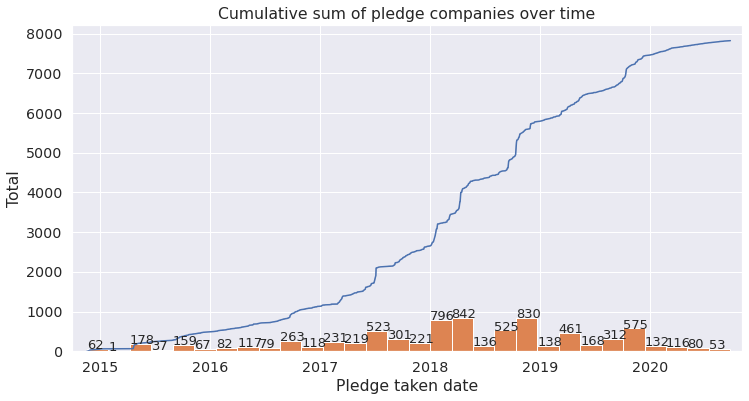

In [13]:
# Create cumultative total column
pledge1['cumsum'] = pledge1.p1_tag.cumsum()

_, ax = plt.subplots(figsize=(12, 6))

# Lineplot
sns.lineplot(x='p1_date',y='cumsum',data=pledge1)

# Histogram
counts,bins,_ = plt.hist(pledge1.p1_date,bins=30)
for c,b in zip(counts, bins):     
    plt.gca().text(b + 0.15, c, str(int(c)), fontsize='small') # +0.15 to center text

# Labels
ax.set_xlim(pd.Timestamp('2014-10-01'),pd.Timestamp('2020-11-01'))
ax.set_title('Cumulative sum of pledge companies over time')
ax.set_xlabel('Pledge taken date')
ax.set_ylabel('Total')

plt.show()

del pledge1['cumsum']

### 2) How soon after founding date was pledge taken? Create `diff_date` column

Found negative values for 178 companies.

In [14]:
pledge1['diff_date'] = ((pledge1.p1_date - pledge1.founded_on).dt.days)/365

print('SUMMARY STATS\nNumber of Years Difference Between Pledge Taken Date and Founded Date\n')
print(pledge1.diff_date.describe(),'\n')

print('Number of companies with a negative difference:',pledge1[pledge1['diff_date'] < 0].shape[0])
print('Number of companies with a difference greater than 50:',pledge1[pledge1['diff_date'] > 50].shape[0],'\n')

# More established, older P1 companies
print('The more established, older Pledge 1% Companies:\n')
print(pledge1[pledge1['diff_date'] > 100][['name', 'diff_date']].sort_values('diff_date', ascending=False).head(10).to_string(index=False))

SUMMARY STATS
Number of Years Difference Between Pledge Taken Date and Founded Date

count    6862.000000
mean        5.870048
std        13.149698
min        -3.191781
25%         1.260274
50%         2.627397
75%         5.788356
max       291.241096
Name: diff_date, dtype: float64 

Number of companies with a negative difference: 178
Number of companies with a difference greater than 50: 67 

The more established, older Pledge 1% Companies:

                         name   diff_date
   The Royal Bank of Scotland  291.241096
              Banco do Brasil  208.084932
                          ACS  201.969863
                      Westpac  200.884932
           Colgate University  199.389041
       University of Virginia  198.334247
          Wesleyan University  187.394521
        University of Alabama  187.356164
 Schneider Electric Indonesia  183.991781
            Boston University  179.898630


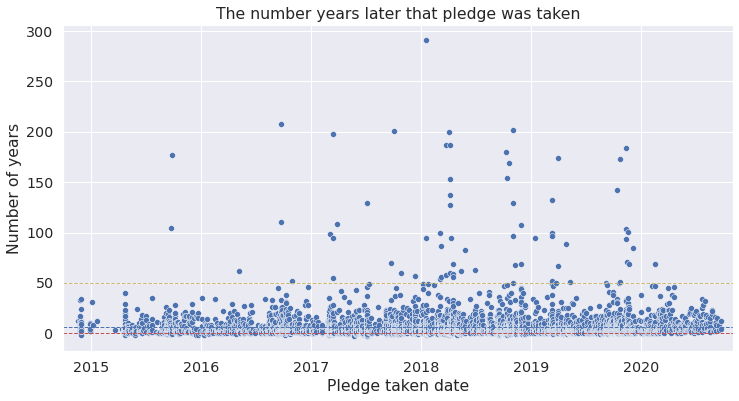

In [15]:
_, ax = plt.subplots(figsize=(12, 6))

# Scatterplot
sns.scatterplot(x='p1_date', y='diff_date', data=pledge1)

# Labels
ax.set_xlim(pd.Timestamp('2014-10-01'),pd.Timestamp('2020-11-01'))
ax.set_title('The number years later that pledge was taken')
ax.set_xlabel('Pledge taken date')
ax.set_ylabel('Number of years')

# Yellow line for years > 50
ax.axhline(y=50, linewidth=1, color='y', ls='--')

# Blue line for mean
ax.axhline(y=pledge1.diff_date.mean(), linewidth=1, color='b', ls='--')

# Red line for years < 0
ax.axhline(y=0, linewidth=1, color='r', ls='--')

# Plot
plt.show()

#### Same plot but for 178 negative values for `diff_date`

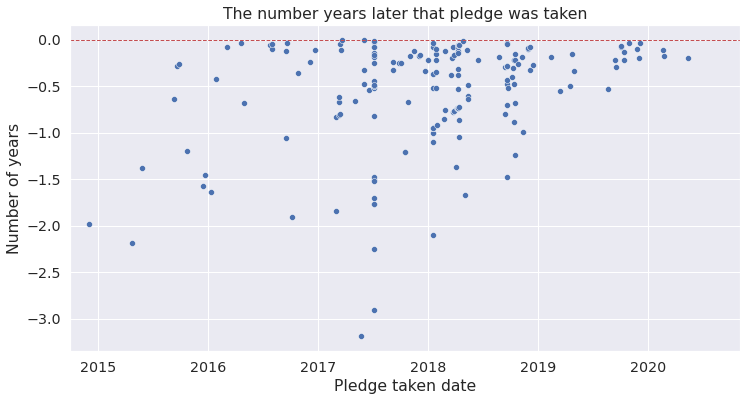

In [16]:
_, ax = plt.subplots(figsize=(12, 6))

# Scatterplot
sns.scatterplot(x='p1_date', y='diff_date', data=pledge1[pledge1['diff_date']<0])

# Labels
ax.set_xlim(pd.Timestamp('2014-10-01'),pd.Timestamp('2020-11-01'))
ax.set_title('The number years later that pledge was taken')
ax.set_xlabel('Pledge taken date')
ax.set_ylabel('Number of years')

# Red line for years < 0
ax.axhline(y=0, linewidth=1, color='r', ls='--')

# Plot
plt.show()

### 3) How do the Pledge 1% and Crunchbase organizations vary by `employee_count`?

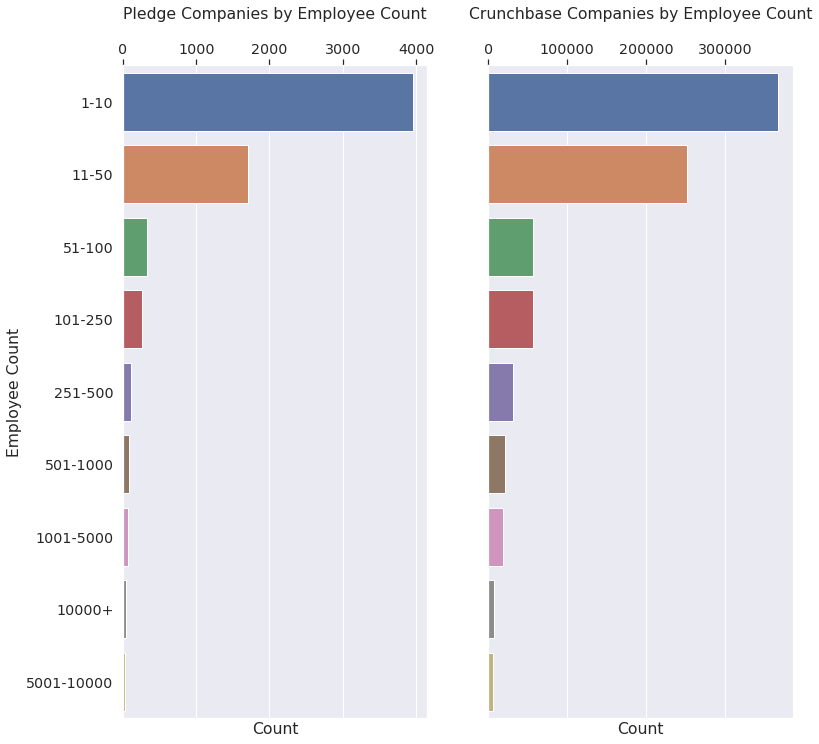

In [17]:
# Exclude rows that have NaN employee_count
pledge1_employee = pledge1[~pledge1['employee_count'].isna()]
df_employee = df[~df['employee_count'].isna()]

# Create count column to sum over
df_employee['count'] = 1

# Groupby 
pledge1_employee = pledge1_employee.groupby(['employee_count'])['p1_tag'].sum().sort_values(ascending=False).reset_index()
df_employee = df_employee.groupby(['employee_count'])['count'].sum().sort_values(ascending=False).reset_index()

# Barplots
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12), sharey=True)
sns.barplot(x='p1_tag', y='employee_count', data=pledge1_employee, orient='h', ax=ax[0])
sns.barplot(x='count', y='employee_count', data=df_employee, orient='h', ax=ax[1])

# Labels
ax[0].set_title('Pledge Companies by Employee Count\n')
ax[0].xaxis.set_ticks_position('top')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Employee Count')
ax[1].set_title('Crunchbase Companies by Employee Count\n')
ax[1].xaxis.set_ticks_position('top')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('')

# Plot
plt.show()

del df_employee, pledge1_employee

###  4) How do the Pledge 1% and Crunchbase organizations vary  by `category_groups_list`?

Create 46 industry indicator columns from `category_groups_list`

#### Pledge 1% data: `pledge1_industry` dataframe

In [18]:
# Start timer
start=time.time()

# Create a new dataframe with a column for each unique category group, fill those with zeros
pledge1_industry = pd.concat([pledge1[~pledge1['category_groups_list'].isna()][['uuid']],pd.DataFrame(columns=groups)]).fillna(0)

# Clean up, reset index
pledge1_industry.reset_index(inplace=True, drop=True)

# Combine all category_groups_list values into a list
Categories = pledge1['category_groups_list'][~pledge1['category_groups_list'].isna()].to_list()

# Populate the matrix
for i in range(pledge1_industry.shape[0]): # By each organization
    row_category_list = Categories[i].split(',') # For each category group
    for industry in row_category_list:
        pledge1_industry[industry][i] = 1 # Update to 1
    
# Create total row & column
pledge1_industry.loc['total',:] = pledge1_industry.sum(axis = 0) # row
pledge1_industry.loc[:,'total'] = pledge1_industry.sum(axis = 1) # columns=

# Replace concatenated string field at the bottom of the dataframe
pledge1_industry.iloc[pledge1_industry.shape[0]-1,0] = 'total'

# Sort columns of a dataframe in descending order, by Total row
rslt_df = pledge1_industry[pledge1_industry.columns.to_list()[1:-1]].sort_values(by ='total', axis=1, ascending=False)

# Update dataframe with sorted columns, keeping uuid and total columns in place
pledge1_industry = pd.concat([pledge1_industry[['uuid']],rslt_df,pledge1_industry[['total']]], axis=1)

# End timer
print('This took {:.4f} seconds to run.'.format(time.time()-start))

# Create plotting dataframe

# Pull totals from bottom row
pledge1_industry_totals = pledge1_industry.iloc[pledge1_industry.shape[0]-1,:].to_list()[1:-1]

# Create sorted columns
groups_sorted = pledge1_industry.columns[1:-1].to_list()

# Check it out
pledge1_industry.head(2)

This took 2.0234 seconds to run.


,uuid,Software,Information Technology,Internet Services,Data and Analytics,Sales and Marketing,Media and Entertainment,Commerce and Shopping,Financial Services,Apps,...,Messaging and Telecommunications,Energy,Platforms,Gaming,Government and Military,Biotechnology,Navigation and Mapping,Agriculture and Farming,Natural Resources,total
0,1c159cb4-f51b-4675-9f64-fdc4275b880f,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,3718597a-dd39-6661-3630-09cdd43bcac2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


#### Crunchbase data:`df_industry` dataframe

In [19]:
###########################################################################################
# STEP 1: Create empty matrix, columns in same order as the Pledge 1% industry dataframe. #
###########################################################################################

# Start timer
start=time.time()

# Create a column for each unique category group, fill with zeros
df_industry = pd.concat([df[~df['category_groups_list'].isna()][['uuid']],pd.DataFrame(columns=groups_sorted)]).fillna(0) # Keep copy()?

# Clean up, reset index
df_industry.reset_index(inplace=True, drop=True)

# End timer
print('STEP 1 takes {:.4f} seconds to run.\n'.format(time.time()-start))

################################################################################################
# STEP 2: The dataframe is too large; loop over segments of 10K rows to populate empty matrix. #
################################################################################################

# Start timer
start=time.time()

# For print statements
counter = 1

# For looping
iteration = 0
loop = 10000

# Empty list to append 10K dataframes into
frames = []

# Combine all category_groups_list values into a list
Categories = df['category_groups_list'][~df['category_groups_list'].isna()].to_list()

# Start loop
print('STEP 2 Counting to',math.ceil(df['category_groups_list'][~df['category_groups_list'].isna()].shape[0]/loop),'--', end=' ')

# Continue until you've iterated through entire dataframe
while iteration < df['category_groups_list'][~df['category_groups_list'].isna()].shape[0]: # ~1M in size
    
    # Create temporary sub-list of categories
    Categories_temp = Categories[iteration:iteration+loop]
    
    # Create temporary smaller empty matrix dataframe
    df_temp = df_industry.iloc[iteration:iteration+loop,:]
    
    # Populate the matrix
    for i in range(df_temp.shape[0]): # By each organization
        row_category_list = Categories_temp[i].split(',') # For each category group
        for industry in row_category_list:
            df_temp[industry][iteration+i] = 1 # Update to 1
    
    # Output progress of loop
    print(counter,end=' ')
    
    # Update counter and iterations
    counter += 1
    iteration += loop
    
    # Append new dataframe to list
    frames.append(df_temp)

# End timer
print('STEP 2 takes {:.4f} seconds to run.\n'.format(time.time()-start))

# Combine all dataframes together.
df_industry = pd.concat(frames)

#####################################
# STEP 3: Add total column and row. #
#####################################

# CREATE TOTAL COLUMN
print('STEP 3 / ROW Counting to',math.ceil(df_industry.shape[0]/20000),'--',end=' ')

# Start timer
start=time.time()

# Add to dataframe
totals_column = np.zeros(df_industry.shape[0])
for i in range(df_industry.shape[0]):
    if i % 20000 == 0:
        print(int((i/20000)+1), end=' ')
    totals_column[i] = df_industry.iloc[i,1:-1].values.sum()
df_industry['total'] = totals_column.astype('int64')

# End timer
print('This takes {:.4f} seconds to run.\n'.format(time.time()-start))

# CREATE TOTAL ROW
print('STEP 3 / COLUMN --', end=' ')

# Start timer
start=time.time()

# Add to dataframe
df_industry_totals = np.zeros(len(df_industry.columns[1:]))
for i in range(len(df_industry.columns)-1):
    df_industry_totals[i] = df_industry.iloc[:,i+1].values.sum()
df_industry.loc['total',1:] = df_industry_totals

# End timer
print('This takes {:.4f} seconds to run.\n'.format(time.time()-start))

# Replace concatenated string field at the bottom of the dataframe
df_industry.iloc[df_industry.shape[0]-1,0] = 'total'

# Save to CSV
print('OUTPUT df_industry TO CSV `files/output/organizations_by_category_group.csv`')
df_industry.to_csv('files/output/organizations_by_category_group.csv', index=False)

STEP 1 takes 13.4837 seconds to run.

STEP 2 Counting to 104 -- 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 

KeyboardInterrupt: 

###  ((( START HERE IF UPLOADING FROM CSV ))) --  `df_industry` dataframe

In [ ]:
df_industry = pd.read_csv('files/output/organizations_by_category_group.csv')
print('SHAPE:',df_industry.shape)
df_industry = reduce_mem_usage(df_industry, verbose=False)
df_industry.tail(2)

#### Spot check that indicator columns match the original dataframe values for `category_groups_list`

In [ ]:
for test_index in [9,50,65,70,71,132,136,138]:
    IN_DATA = df['category_groups_list'][~df['category_groups_list'].isna()].to_list()[test_index].split(',')
    IN_MATRIX = df_industry.iloc[test_index,:-1][df_industry.iloc[test_index,:]==1].index.to_list()
    if 'total' in IN_MATRIX:
        IN_MATRIX.remove('total')
    IN_DATA.sort()
    IN_MATRIX.sort()
    if IN_DATA == IN_MATRIX:
        print('SUCCESS! INDEX {} MATCHES'.format(test_index))
del IN_DATA, IN_MATRIX

#### Plot comparisons -- `pledge1_industry_plt` & `df_industry_plt` dataframes

In [ ]:
# Create plotting dataframes
pledge1_industry_totals = [3546, 1868, 1525, 1077, 1005,  949,  922,  920,  832,  784,  767,
                           759,  724,  591,  581,  485,  446,  417,  389,  369,  343,  317,
                           265,  260,  253,  245,  226,  203,  195,  188,  176,  175,  174,
                           170,  159,  136,  133,  129,  125,  115,  111,  107,   90,   81, 79,   75]
df_industry_totals = df_industry.iloc[-1,:].to_list()[1:-1]
groups_sorted = df_industry.columns.to_list()[1:-1]
pledge1_industry_plt = pd.DataFrame.from_dict({'Category':groups_sorted, 'Count':pledge1_industry_totals})
df_industry_plt = pd.DataFrame.from_dict({'Category':groups_sorted, 'Count':df_industry_totals})

# Barplots
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 16), sharey=True)
sns.barplot(y='Category', x='Count', data=pledge1_industry_plt, orient='h', ax=ax[0])
sns.barplot(y='Category', x='Count', data=df_industry_plt, orient='h', ax=ax[1])

# Labels
ax[0].set_title('Pledge Companies by Category\n')
ax[0].xaxis.set_ticks_position('top')
ax[0].set_ylabel('')
ax[1].set_title('Crunchbase Companies by Category\n')
ax[1].xaxis.set_ticks_position('top')
ax[1].set_ylabel('')

plt.show()

del pledge1_industry_plt, df_industry_plt, df_industry, pledge1_industry

###  5) How do the Pledge 1% and Crunchbase organizations vary by `country_code`?

#### Plot comparisons -- `pledge1_countries` & `df_countries` dataframes

In [ ]:
# Create plotting dataframes of top 25 countries
pledge1_countries = pledge1[~pledge1['country_code'].isna()] 
pledge1_countries = pledge1_countries.groupby(['country_code'])['p1_tag'].sum().sort_values(ascending=False).reset_index()
pledge1_countries = pledge1_countries[pledge1_countries['p1_tag'] >= 25]
top_25_p1_countries = pledge1_countries['country_code'].to_list()
df_countries = df[~df['country_code'].isna()]
df_countries['count'] = 1
df_countries = df_countries.groupby(['country_code'])['count'].sum().sort_values(ascending=False).reset_index()
df_countries = df_countries.set_index('country_code').reindex(top_25_p1_countries).reset_index()

# Barplots
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12), sharey=True)
sns.barplot(x='p1_tag', y='country_code', data=pledge1_countries, orient='h', ax=ax[0])
sns.barplot(x='count', y='country_code', data=df_countries, orient='h', ax=ax[1])

# Labels
ax[0].set_title('Pledge Companies by Country\n')
ax[0].xaxis.set_ticks_position('top')
ax[0].set_ylabel('Country Code')
ax[0].set_xlabel('Count')
ax[1].set_title('Crunchbase Companies by Country\n')
ax[1].xaxis.set_ticks_position('top')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('')

plt.show()

del pledge1_countries, df_countries, pledge1

### 6) How large is the Pledge 1% network?

- Investors in Pledge 1% organizations
- Partner investors in Pledge 1% organizations
- Current job affiliations with Pledge 1% organizations

#### Create `p1_fund_rnds`, `p1_invest`, `p1_invest_prtnr`, `p1_jobs` dataframes

In [ ]:
print('STEP 1: Outer merge Pledge 1% and funding rounds to get Pledge 1% funding rounds dataframe')
# Merge funding rounds and p1 dataframes on the organization uuid
p1['org_uuid'] = p1['uuid']
p1_fund_rnds = pd.merge(fund_rnds, p1, how='outer', on='org_uuid')
p1_fund_rnds = p1_fund_rnds.drop(['uuid_y'],axis=1).rename(columns={'uuid_x':'funding_round_uuid'})
p1=p1.drop(['org_uuid'],axis=1)
p1_fund_rnds = p1_fund_rnds[~p1_fund_rnds['funding_round_uuid'].isna()].reset_index(drop=True)
p1_fund_rnds.to_csv('files/output/p1_funding_rounds.csv', index=False)
print('OUTPUT p1_fund_rnds TO CSV `files/output/p1_funding_rounds.csv`\n')

print('STEP 2: Outer merge investments and Pledge 1% funding rounds to get Pledge 1% investments dataframe')
# Merge invest and p1_fund_rnds dataframes on the funding round uuid
p1_invest = pd.merge(invest, p1_fund_rnds, how='outer', on='funding_round_uuid')
p1_invest = p1_invest.rename(columns={'uuid':'investment_uuid'})
p1_invest = p1_invest[~p1_invest['investment_uuid'].isna()].reset_index(drop=True)
p1_invest.to_csv('files/output/p1_investments.csv', index=False)
print('OUTPUT p1_invest TO CSV `files/output/p1_investments.csv`\n')

print('STEP 3: Outer merge partner investments and Pledge 1% funding rounds to get Pledge 1% partner investments dataframe')
# Merge invest_prtnr and p1_fund_rnds dataframes on the funding round uuid
p1_invest_prtnr = pd.merge(invest_prtnr, p1_fund_rnds, how='outer', on='funding_round_uuid')
p1_invest_prtnr = p1_invest_prtnr.rename(columns={'uuid':'investment_uuid'})
p1_invest_prtnr = p1_invest_prtnr[~p1_invest_prtnr['investment_uuid'].isna()].reset_index(drop=True)
p1_invest_prtnr.to_csv('files/output/p1_investments_partner.csv', index=False)
print('OUTPUT p1_invest_prtnr TO CSV `files/output/p1_investments_partner.csv`\n')

print('STEP 4: Outer merge Pledge 1% and jobs to get Pledge 1% jobs dataframe')
# Merge jobs and p1 dataframes on the organization uuid
p1['org_uuid'] = p1['uuid']
p1_jobs = pd.merge(jobs,p1,how='outer',on='org_uuid')
p1=p1.drop(['org_uuid'],axis=1)
p1_jobs = p1_jobs.drop(['uuid_y'],axis=1).rename(columns={'uuid_x':'job_uuid'})
p1_jobs = p1_jobs[~p1_jobs['job_uuid'].isna()].reset_index(drop=True)
p1_jobs.to_csv('files/output/p1_jobs.csv', index=False)
print('OUTPUT p1_jobs TO CSV `files/output/p1_jobs.csv`')

del p1_fund_rnds

### Print out comparisons between size of Crunchbase and Pledge 1% networks

In [ ]:
# Import merged p1 dataframes
df = pd.read_csv('files/output/organizations_merged.csv')
df = reduce_mem_usage(df, verbose=False)
p1_invest = pd.read_csv('files/output/p1_investments.csv')
p1_invest = reduce_mem_usage(p1_invest, verbose=False)
p1_invest_prtnr = pd.read_csv('files/output/p1_investments_partner.csv')
p1_invest_prtnr = reduce_mem_usage(p1_invest_prtnr, verbose=False)
p1_jobs = pd.read_csv('files/output/p1_jobs.csv')
p1_jobs = reduce_mem_usage(p1_jobs, verbose=False)

# Convert to datetime - p1_date
df['p1_date'] = pd.to_datetime(df['p1_date'], errors='coerce')
p1_invest['p1_date'] = pd.to_datetime(p1_invest['p1_date'], errors='coerce')
p1_invest_prtnr['p1_date'] = pd.to_datetime(p1_invest_prtnr['p1_date'], errors='coerce')
p1_jobs['p1_date'] = pd.to_datetime(p1_jobs['p1_date'], errors='coerce')

# Convert to datetime - other date fields
df['founded_on'] = pd.to_datetime(df['founded_on'], errors='coerce')
df['closed_on'] = pd.to_datetime(df['closed_on'], errors='coerce')
p1_invest['announced_on'] = pd.to_datetime(p1_invest['announced_on'], errors='coerce')
p1_invest_prtnr['announced_on'] = pd.to_datetime(p1_invest_prtnr['announced_on'], errors='coerce')
p1_jobs['started_on'] = pd.to_datetime(p1_jobs['started_on'], errors='coerce')
p1_jobs['ended_on'] = pd.to_datetime(p1_jobs['ended_on'], errors='coerce')

from datetime import datetime

def size_of_network(date, df, invest, invest_prtnr, jobs):
    date = pd.Timestamp(date)
    print('\nAS OF {}:\n'.format(date.strftime('%B %d, %Y').upper()))
    
    print('='*20)
    print('NUMBER OF COMPANIES')
    print('-'*20)
    print('\nCrunchbase: {:,}'.format(len(df['uuid'][(df['founded_on'] <= date) & ((df['closed_on'] >= date) | (pd.isnull(df['closed_on']))) &(df['primary_role']=='company')].unique())))
    print('Pledge 1%: {:,}\n'.format(len(df['uuid'][(df['founded_on'] <= date) & 
                                                    ((df['closed_on'] >= date) | (pd.isnull(df['closed_on']))) &
                                                    (df['primary_role']=='company') & 
                                                    (df['p1_date'] <= date)].unique())))
    
    print('='*20)
    print('NUMBER OF INVESTORS')
    print('-'*20)
    print('\nCrunchbase: {:,}'.format(len(df['uuid'][(df['founded_on'] <= date) & ((df['closed_on'] >= date) | (pd.isnull(df['closed_on']))) &(df['primary_role']=='investor')].unique())))
    print('Pledge 1%: {:,}\n'.format(len(df['uuid'][(df['founded_on'] <= date) & ((df['closed_on'] >= date) | (pd.isnull(df['closed_on']))) &(df['primary_role']=='investor') & (df['p1_date'] <= date)].unique())))
    
    print('='*20)
    print('NUMBER OF INVESTMENTS')
    print('-'*20)
    print('\nIN ALL OF CRUNCHBASE')
    print('Company Investments: {:,} ({:,} Unique Investors)'.format(len(invest['investment_uuid'][(invest['announced_on'] <= date) & (invest['investor_type']=='organization')].unique()),len(invest['investor_uuid'][(invest['announced_on'] <= date) & (invest['investor_type']=='organization')].unique())))
    print('Partner Investments: {:,} ({:,} Unique investors)'.format(len(invest_prtnr['investment_uuid'][invest_prtnr['announced_on'] <= date].unique()),len(invest_prtnr['partner_uuid'][invest_prtnr['announced_on'] <= date].unique())))
    print('\nIN PLEDGE 1% ORGANIZATIONS')
    print('Company Investments: {:,} ({:,} Unique Investors)'.format(len(invest['investment_uuid'][(invest['announced_on'] <= date) & (invest['investor_type']=='organization') & (invest['p1_tag']==1)].unique()),len(invest['investor_uuid'][(invest['announced_on'] <= date) & (invest['investor_type']=='organization') &  (invest['p1_tag']==1)].unique())))
    print('Partner Investments: {:,} ({:,} Unique Investors)\n'.format(len(invest_prtnr['investment_uuid'][(invest_prtnr['announced_on'] <= date) & (invest_prtnr['p1_tag']==1)].unique()),len(invest_prtnr['partner_uuid'][(invest_prtnr['announced_on'] <= date)& (invest_prtnr['p1_tag']==1)].unique())))
    
    print('='*20)
    print('NUMBER OF PEOPLE')
    print('-'*20)
    print('\nCRUNCHBASE')
    print('Executives: {:,}'.format(len(jobs['person_uuid'][(jobs['job_type']=='executive') & (jobs['started_on']<= date) & ((jobs['ended_on']>=date) | (pd.isnull(jobs['ended_on'])))].unique())))
    print('Board Members: {:,}'.format(len(jobs['person_uuid'][(jobs['job_type']=='board_member') & (jobs['started_on']<= date) & ((jobs['ended_on']>=date) | (pd.isnull(jobs['ended_on'])))].unique())))
    print('Advisors: {:,}'.format(len(jobs['person_uuid'][(jobs['job_type'].isin(['advisor','board_observer'])) & (jobs['started_on']<= date) & ((jobs['ended_on']>=date) | (pd.isnull(jobs['ended_on'])))].unique())))
    print('\nPLEDGE 1%')  
    print('Executives: {:,}'.format(len(jobs['person_uuid'][(jobs['job_type']=='executive') & (jobs['started_on']<= date) & ((jobs['ended_on']>=date) | (pd.isnull(jobs['ended_on']))) & (jobs['p1_tag']==1) & (jobs['p1_date'] <= date)].unique())))
    print('Board Members: {:,}'.format(len(jobs['person_uuid'][(jobs['job_type']=='board_member') & (jobs['started_on']<= date) & ((jobs['ended_on']>=date) | (pd.isnull(jobs['ended_on']))) & (jobs['p1_tag']==1) & (jobs['p1_date'] <= date)].unique())))
    print('Advisors: {:,}'.format(len(jobs['person_uuid'][(jobs['job_type'].isin(['advisor','board_observer'])) & (jobs['started_on']<= date) & ((jobs['ended_on']>=date) | (pd.isnull(jobs['ended_on']))) & (jobs['p1_tag']==1) & (jobs['p1_date'] <= date)].unique())))
    

In [ ]:
size_of_network('2015-09-08', df, p1_invest, p1_invest_prtnr, p1_jobs)

In [ ]:
size_of_network('2020-09-08', df, p1_invest, p1_invest_prtnr, p1_jobs)